In [1]:
import distributions as dist
import numpy as np
import matplotlib.pyplot as plt
import ppi
import ppi_py
import scipy.stats as stats
import pandas as pd
import ml_models as ml
import distributions as dist

import yaml
import os
import sys
import argparse
import plotting
import copy

c:\Users\Ziyu\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Notebook for testing things that are/aren't working

In [93]:
def test(config):
    rho_vals = [.1, .2]
    pop_config = config['experiment']['parameters']['gold_population']
    for rho in rho_vals:
        pop_config['y_population']['rho'] = rho
        x_gold, y_gold = dist.sample_population(pop_config)

        print(pop_config['x_population']['size'])

        # print the gold population standard error
        print("Gold Population Standard Error: ", stats.sem(y_gold))

        # plot the x population and the y population
        fig, ax = plt.subplots(2)
        ax[0].hist(x_gold, bins=50)
        ax[0].set_title("X Population")
        ax[1].scatter(x_gold, y_gold, alpha=0.5)
        ax[1].set_title("Y Population")
        plt.show()

        ml_config = config['experiment']['model']

        train_config = copy.deepcopy(pop_config)
        train_config['x_population']['size'] = 10000

        x_train, y_train = dist.sample_population(train_config)

        model = ml.train_model(x_train, y_train, ml_config)

        y_gold_fitted = model.predict(x_gold)

        # plot the gold population and the fitted gold population

        fig, ax = plt.subplots(2)

        ax[0].scatter(x_gold, y_gold, alpha=0.5)
        ax[0].set_title("Gold Population")
        ax[1].scatter(x_gold, y_gold_fitted, alpha=0.5)
        ax[1].set_title("Fitted Gold Population")
        plt.show()
    

    return 

10000
Gold Population Standard Error:  [0.01434229]


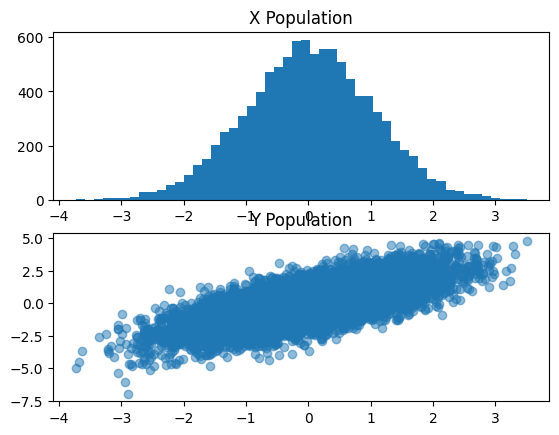

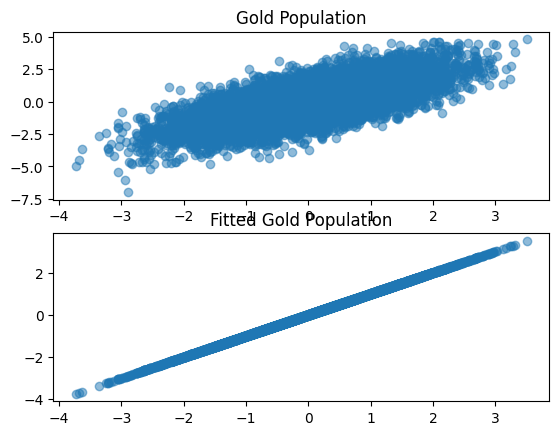

10000
Gold Population Standard Error:  [0.02277681]


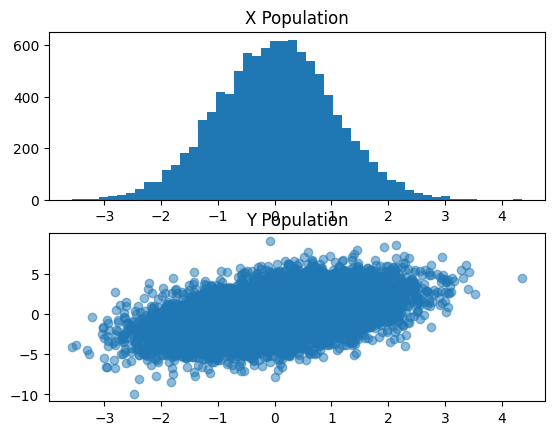

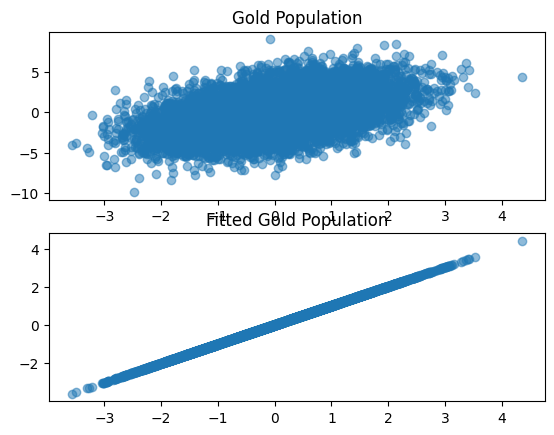

In [94]:
config = "../configs/pptest.yaml"
with open(config, 'r') as stream:
    config = yaml.safe_load(stream)
test(config)

In [88]:
config = "../configs/pptest.yaml"
with open(config, 'r') as stream:
    config = yaml.safe_load(stream)

ppi_pp_win_count = 0
ppi_win_count = 0

relative_improvement = []

for i in range(1):
    # sample

    x_train, y_train = dist.sample_population(config['experiment']['parameters']['training_population'])
    x_gold, y_gold = dist.sample_population(config['experiment']['parameters']['gold_population'])
    x_ppi, y_ppi = dist.sample_population(config['experiment']['parameters']['unlabelled_population'])

    print(y_gold.shape)

    # train
    ml_config = config['experiment']['model']
    model = ml.train_model(x_train, y_train, ml_config)

    # predict
    y_gold_fitted = model.predict(x_gold)
    y_ppi_fitted = model.predict(x_ppi)

    # ppi
    ppi_pp_mean = ppi_py.ppi_mean_pointestimate(y_gold, y_gold_fitted, y_ppi_fitted)
    ppi_pp_ci = ppi_py.ppi_mean_ci(y_gold, y_gold_fitted, y_ppi_fitted)

    ppi_mean = ppi_py.ppi_mean_pointestimate(y_gold, y_gold_fitted, y_ppi_fitted, lhat=1)
    ppi_ci = ppi_py.ppi_mean_ci(y_gold, y_gold_fitted, y_ppi_fitted, lhat=1)

    classical_mean, classical_ci = ppi.do_classical_ci_mean(y_gold, y_gold_fitted, y_ppi_fitted, .9)

    print("PPI++: ", ppi_pp_mean, ppi_pp_ci, ppi_pp_ci[1] - ppi_pp_ci[0])
    print("PPI: ", ppi_mean, ppi_ci, ppi_ci[1] - ppi_ci[0])
    print("Classical: ", classical_mean, classical_ci, classical_ci[1] - classical_ci[0])
    
    # print the result that performed better
    if ppi_pp_ci[1] - ppi_pp_ci[0] < ppi_ci[1] - ppi_ci[0]:
        print("PPI++ performed better")
        ppi_pp_win_count += 1
    else:
        print("PPI performed better")
        ppi_win_count += 1
    
    # append relative improvement of ppi_pp over ppi
    relative_improvement.append(((ppi_ci[1] - ppi_ci[0]) - (ppi_pp_ci[1] - ppi_pp_ci[0]))/(ppi_ci[1] - ppi_ci[0]))

print("PPI++ Win Count: ", ppi_pp_win_count, "PPI Win Count: ", ppi_win_count)
print("Average Relative Improvement: ", np.mean(relative_improvement))

(10000, 1)
PPI++:  [0.00974909] (array([-0.00188768]), array([0.02138585])) [0.02327352]
PPI:  [0.00326268] (array([-0.0130306]), array([0.01955595])) [0.03258655]
Classical:  0.01639004627577222 (-9.848413003240089e-05, 0.03287857668157684) 0.03297706081160924
PPI++ performed better
PPI++ Win Count:  1 PPI Win Count:  0
Average Relative Improvement:  0.2857935818332208


In [84]:
stats.sem(np.array([1, 2, 3, 4]))

0.6454972243679028

In [5]:
min = 2
max = 5

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([9, 8, 7, 6, 5, 4, 3, 2, 1])

x_cut = x[(x <= max) & (x >= min)]
y_cut = y[(x <= max) & (x >= min)]

print(x_cut, y_cut)

[2 3 4 5] [8 7 6 5]
